In [1]:
### Imports (TODO remove this when finished)
%load_ext autoreload
%autoreload 2

# Append root folder in case you haven't installed NIDN
import sys
sys.path.append("../..")

import nidn

08:46:37|NIDN-INFO| Initialized NIDN for cpu
08:46:37|NIDN-INFO| Using double precision


### Define filter target

Physical wavelengths are (in meters):
[1.00000000e-05 7.75000000e-06 6.32653061e-06 5.34482759e-06
 4.62686567e-06 4.07894737e-06 3.64705882e-06 3.29787234e-06
 3.00970874e-06 2.76785714e-06 2.56198347e-06 2.38461538e-06
 2.23021583e-06 2.09459459e-06 1.97452229e-06 1.86746988e-06
 1.77142857e-06 1.68478261e-06 1.60621762e-06 1.53465347e-06
 1.46919431e-06 1.40909091e-06 1.35371179e-06 1.30252101e-06
 1.25506073e-06 1.21093750e-06 1.16981132e-06 1.13138686e-06
 1.09540636e-06 1.06164384e-06 1.02990033e-06 1.00000000e-06]


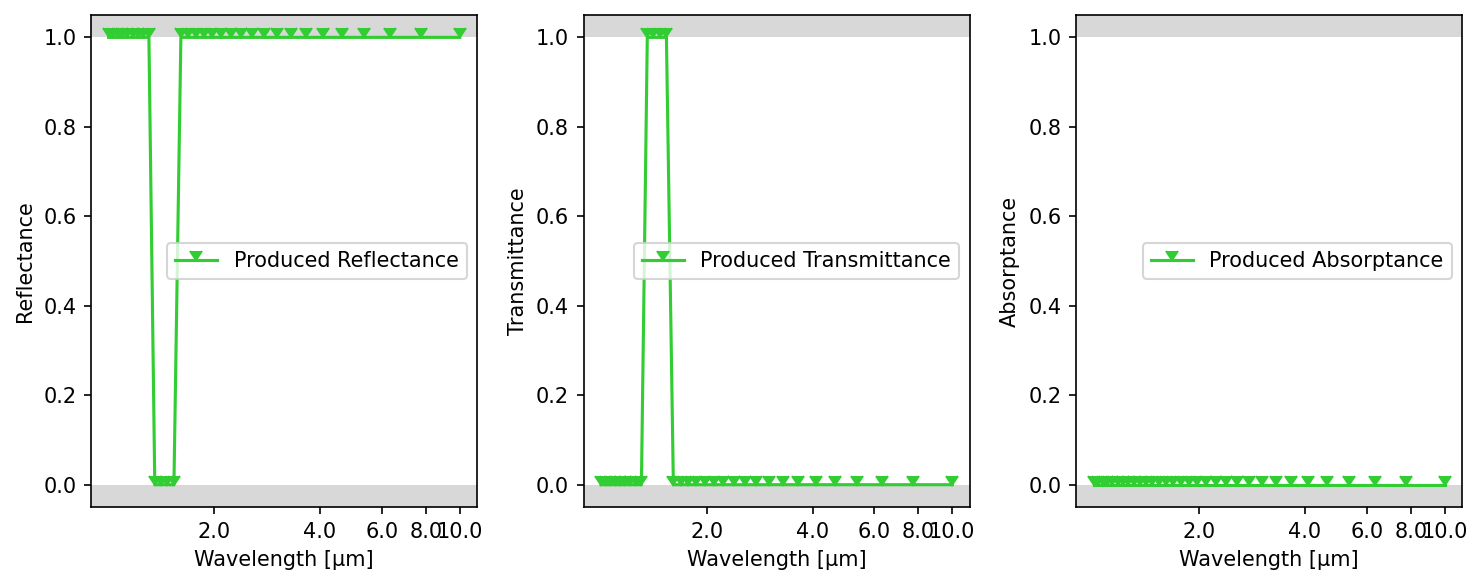

In [2]:
cfg = nidn.load_default_cfg() # Load default cfg as starting point


# 1550 Filter
cfg.target_reflectance_spectrum =   19*[1.0] + 4*[0.0] + 9*[1.0]
cfg.target_transmittance_spectrum = 19*[0.0] + 4*[1.0] + 9*[0.0]
cfg.PER_LAYER_THICKNESS = [1.]
cfg.TRCWA_L_grid = [[1.0,0.0],[0.0,1.0]]
cfg.physical_wavelength_range[0] = 1e-6
cfg.physical_wavelength_range[1] = 1e-5
cfg.freq_distribution = "linear"

cfg.siren_omega = 1.

cfg.N_freq = 32

nidn.plot_spectrum(cfg,
                   cfg.target_reflectance_spectrum,
                   cfg.target_transmittance_spectrum)

physical_wls, normalized_freqs = nidn.get_frequency_points(cfg)
print("Physical wavelengths are (in meters):")
print(physical_wls)

In [3]:
cfg.pop("model",None); # Forget the old model

cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.eps_oversampling = 1
cfg.learning_rate = 8e-5
cfg.N_layers = 10 # Choose number of layers

# Allowed range of epsilon values
cfg.real_min_eps = 0.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 1.0

cfg.type = "regression" # Choose type as described above
cfg.iterations = 5000 # Set number of training iterations (that is forward model evaluations) to perform

In [4]:
nidn.run_training(cfg);

08:46:40|NIDN-INFO| ###  New Best=0.3968 with SpectrumLoss=0.3968 ### L1=0.3968
08:46:40|NIDN-INFO| It=0     Loss=0.3968   |  weighted_avg=0.3968  |  SpectrumLoss=0.3968 | L1=0.3968
08:46:41|NIDN-INFO| ###  New Best=0.3877 with SpectrumLoss=0.3877 ### L1=0.3877
08:46:42|NIDN-INFO| ###  New Best=0.3761 with SpectrumLoss=0.3761 ### L1=0.3761
08:46:44|NIDN-INFO| ###  New Best=0.3637 with SpectrumLoss=0.3637 ### L1=0.3637
08:46:45|NIDN-INFO| ###  New Best=0.3480 with SpectrumLoss=0.3480 ### L1=0.3480
08:46:47|NIDN-INFO| ###  New Best=0.3417 with SpectrumLoss=0.3417 ### L1=0.3417
08:46:47|NIDN-INFO| It=5     Loss=0.3417   |  weighted_avg=0.3690  |  SpectrumLoss=0.3417 | L1=0.3417
08:46:48|NIDN-INFO| ###  New Best=0.3348 with SpectrumLoss=0.3348 ### L1=0.3348
08:46:50|NIDN-INFO| ###  New Best=0.3325 with SpectrumLoss=0.3325 ### L1=0.3325
08:46:51|NIDN-INFO| ###  New Best=0.3244 with SpectrumLoss=0.3244 ### L1=0.3244
08:46:52|NIDN-INFO| ###  New Best=0.3164 with SpectrumLoss=0.3164 ### L1=0.3

08:48:39|NIDN-INFO| It=80    Loss=0.1759   |  weighted_avg=0.1844  |  SpectrumLoss=0.1759 | L1=0.1759
08:48:41|NIDN-INFO| ###  New Best=0.1735 with SpectrumLoss=0.1735 ### L1=0.1735
08:48:43|NIDN-INFO| ###  New Best=0.1732 with SpectrumLoss=0.1732 ### L1=0.1732
08:48:44|NIDN-INFO| ###  New Best=0.1715 with SpectrumLoss=0.1715 ### L1=0.1715
08:48:46|NIDN-INFO| ###  New Best=0.1711 with SpectrumLoss=0.1711 ### L1=0.1711
08:48:48|NIDN-INFO| ###  New Best=0.1701 with SpectrumLoss=0.1701 ### L1=0.1701
08:48:48|NIDN-INFO| It=85    Loss=0.1701   |  weighted_avg=0.1793  |  SpectrumLoss=0.1701 | L1=0.1701
08:48:49|NIDN-INFO| ###  New Best=0.1692 with SpectrumLoss=0.1692 ### L1=0.1692
08:48:50|NIDN-INFO| ###  New Best=0.1685 with SpectrumLoss=0.1685 ### L1=0.1685
08:48:52|NIDN-INFO| ###  New Best=0.1677 with SpectrumLoss=0.1677 ### L1=0.1677
08:48:54|NIDN-INFO| It=90    Loss=0.1681   |  weighted_avg=0.1746  |  SpectrumLoss=0.1681 | L1=0.1681
08:48:57|NIDN-INFO| ###  New Best=0.1675 with Spectrum

08:50:40|NIDN-INFO| It=165   Loss=0.1282   |  weighted_avg=0.1320  |  SpectrumLoss=0.1282 | L1=0.1282
08:50:44|NIDN-INFO| ###  New Best=0.1267 with SpectrumLoss=0.1267 ### L1=0.1267
08:50:45|NIDN-INFO| ###  New Best=0.1256 with SpectrumLoss=0.1256 ### L1=0.1256
08:50:47|NIDN-INFO| It=170   Loss=0.1258   |  weighted_avg=0.1299  |  SpectrumLoss=0.1258 | L1=0.1258
08:50:48|NIDN-INFO| ###  New Best=0.1251 with SpectrumLoss=0.1251 ### L1=0.1251
08:50:50|NIDN-INFO| ###  New Best=0.1244 with SpectrumLoss=0.1244 ### L1=0.1244
08:50:51|NIDN-INFO| ###  New Best=0.1241 with SpectrumLoss=0.1241 ### L1=0.1241
08:50:52|NIDN-INFO| ###  New Best=0.1238 with SpectrumLoss=0.1238 ### L1=0.1238
08:50:54|NIDN-INFO| ###  New Best=0.1236 with SpectrumLoss=0.1236 ### L1=0.1236
08:50:54|NIDN-INFO| It=175   Loss=0.1236   |  weighted_avg=0.1280  |  SpectrumLoss=0.1236 | L1=0.1236
08:50:55|NIDN-INFO| ###  New Best=0.1234 with SpectrumLoss=0.1234 ### L1=0.1234
08:51:01|NIDN-INFO| ###  New Best=0.1227 with Spectrum

08:52:36|NIDN-INFO| It=250   Loss=0.1013   |  weighted_avg=0.1031  |  SpectrumLoss=0.1013 | L1=0.1013
08:52:38|NIDN-INFO| ###  New Best=0.1000 with SpectrumLoss=0.1000 ### L1=0.1000
08:52:39|NIDN-INFO| ###  New Best=0.0991 with SpectrumLoss=0.0991 ### L1=0.0991
08:52:41|NIDN-INFO| ###  New Best=0.0985 with SpectrumLoss=0.0985 ### L1=0.0985
08:52:42|NIDN-INFO| ###  New Best=0.0980 with SpectrumLoss=0.0980 ### L1=0.0980
08:52:43|NIDN-INFO| ###  New Best=0.0976 with SpectrumLoss=0.0976 ### L1=0.0976
08:52:43|NIDN-INFO| It=255   Loss=0.0976   |  weighted_avg=0.1014  |  SpectrumLoss=0.0976 | L1=0.0976
08:52:50|NIDN-INFO| ###  New Best=0.0966 with SpectrumLoss=0.0966 ### L1=0.0966
08:52:50|NIDN-INFO| It=260   Loss=0.0966   |  weighted_avg=0.1001  |  SpectrumLoss=0.0966 | L1=0.0966
08:52:51|NIDN-INFO| ###  New Best=0.0961 with SpectrumLoss=0.0961 ### L1=0.0961
08:52:53|NIDN-INFO| ###  New Best=0.0958 with SpectrumLoss=0.0958 ### L1=0.0958
08:52:54|NIDN-INFO| ###  New Best=0.0955 with Spectrum

08:56:27|NIDN-INFO| It=420   Loss=0.1214   |  weighted_avg=0.1463  |  SpectrumLoss=0.1214 | L1=0.1214
08:56:34|NIDN-INFO| It=425   Loss=0.1340   |  weighted_avg=0.1376  |  SpectrumLoss=0.1340 | L1=0.1340
08:56:41|NIDN-INFO| It=430   Loss=0.1283   |  weighted_avg=0.1298  |  SpectrumLoss=0.1283 | L1=0.1283
08:56:48|NIDN-INFO| It=435   Loss=0.1797   |  weighted_avg=0.1345  |  SpectrumLoss=0.1797 | L1=0.1797
08:56:55|NIDN-INFO| It=440   Loss=0.1557   |  weighted_avg=0.1428  |  SpectrumLoss=0.1557 | L1=0.1557
08:57:02|NIDN-INFO| It=445   Loss=0.1269   |  weighted_avg=0.1463  |  SpectrumLoss=0.1269 | L1=0.1269
08:57:09|NIDN-INFO| It=450   Loss=0.1446   |  weighted_avg=0.1485  |  SpectrumLoss=0.1446 | L1=0.1446
08:57:15|NIDN-INFO| It=455   Loss=0.1604   |  weighted_avg=0.1468  |  SpectrumLoss=0.1604 | L1=0.1604
08:57:22|NIDN-INFO| It=460   Loss=0.1707   |  weighted_avg=0.1487  |  SpectrumLoss=0.1707 | L1=0.1707
08:57:29|NIDN-INFO| It=465   Loss=0.1574   |  weighted_avg=0.1538  |  SpectrumLoss

09:02:13|NIDN-INFO| It=675   Loss=0.0891   |  weighted_avg=0.0951  |  SpectrumLoss=0.0891 | L1=0.0891
09:02:20|NIDN-INFO| It=680   Loss=0.0879   |  weighted_avg=0.0919  |  SpectrumLoss=0.0879 | L1=0.0879
09:02:27|NIDN-INFO| It=685   Loss=0.0909   |  weighted_avg=0.0884  |  SpectrumLoss=0.0909 | L1=0.0909
09:02:34|NIDN-INFO| It=690   Loss=0.0731   |  weighted_avg=0.0874  |  SpectrumLoss=0.0731 | L1=0.0731
09:02:41|NIDN-INFO| It=695   Loss=0.0719   |  weighted_avg=0.0807  |  SpectrumLoss=0.0719 | L1=0.0719
09:02:47|NIDN-INFO| It=700   Loss=0.0580   |  weighted_avg=0.0740  |  SpectrumLoss=0.0580 | L1=0.0580
09:02:54|NIDN-INFO| It=705   Loss=0.0556   |  weighted_avg=0.0663  |  SpectrumLoss=0.0556 | L1=0.0556
09:03:00|NIDN-INFO| It=710   Loss=0.0487   |  weighted_avg=0.0579  |  SpectrumLoss=0.0487 | L1=0.0487
09:03:07|NIDN-INFO| It=715   Loss=0.0461   |  weighted_avg=0.0535  |  SpectrumLoss=0.0461 | L1=0.0461
09:03:13|NIDN-INFO| It=720   Loss=0.0478   |  weighted_avg=0.0496  |  SpectrumLoss

09:07:55|NIDN-INFO| ###  New Best=0.0239 with SpectrumLoss=0.0239 ### L1=0.0239
09:07:57|NIDN-INFO| ###  New Best=0.0236 with SpectrumLoss=0.0236 ### L1=0.0236
09:08:01|NIDN-INFO| ###  New Best=0.0228 with SpectrumLoss=0.0228 ### L1=0.0228
09:08:01|NIDN-INFO| It=935   Loss=0.0228   |  weighted_avg=0.0262  |  SpectrumLoss=0.0228 | L1=0.0228
09:08:02|NIDN-INFO| ###  New Best=0.0226 with SpectrumLoss=0.0226 ### L1=0.0226
09:08:04|NIDN-INFO| ###  New Best=0.0224 with SpectrumLoss=0.0224 ### L1=0.0224
09:08:08|NIDN-INFO| It=940   Loss=0.0233   |  weighted_avg=0.0247  |  SpectrumLoss=0.0233 | L1=0.0233
09:08:09|NIDN-INFO| ###  New Best=0.0223 with SpectrumLoss=0.0223 ### L1=0.0223
09:08:11|NIDN-INFO| ###  New Best=0.0218 with SpectrumLoss=0.0218 ### L1=0.0218
09:08:12|NIDN-INFO| ###  New Best=0.0218 with SpectrumLoss=0.0218 ### L1=0.0218
09:08:15|NIDN-INFO| It=945   Loss=0.0226   |  weighted_avg=0.0236  |  SpectrumLoss=0.0226 | L1=0.0226
09:08:19|NIDN-INFO| ###  New Best=0.0216 with Spectrum

09:12:17|NIDN-INFO| ###  New Best=0.0160 with SpectrumLoss=0.0160 ### L1=0.0160
09:12:18|NIDN-INFO| It=1125  Loss=0.0163   |  weighted_avg=0.0182  |  SpectrumLoss=0.0163 | L1=0.0163
09:12:21|NIDN-INFO| ###  New Best=0.0159 with SpectrumLoss=0.0159 ### L1=0.0159
09:12:25|NIDN-INFO| ###  New Best=0.0156 with SpectrumLoss=0.0156 ### L1=0.0156
09:12:25|NIDN-INFO| It=1130  Loss=0.0156   |  weighted_avg=0.0170  |  SpectrumLoss=0.0156 | L1=0.0156
09:12:28|NIDN-INFO| ###  New Best=0.0156 with SpectrumLoss=0.0156 ### L1=0.0156
09:12:31|NIDN-INFO| ###  New Best=0.0156 with SpectrumLoss=0.0156 ### L1=0.0156
09:12:32|NIDN-INFO| ###  New Best=0.0155 with SpectrumLoss=0.0155 ### L1=0.0155
09:12:32|NIDN-INFO| It=1135  Loss=0.0155   |  weighted_avg=0.0163  |  SpectrumLoss=0.0155 | L1=0.0155
09:12:33|NIDN-INFO| ###  New Best=0.0154 with SpectrumLoss=0.0154 ### L1=0.0154
09:12:36|NIDN-INFO| ###  New Best=0.0153 with SpectrumLoss=0.0153 ### L1=0.0153
09:12:39|NIDN-INFO| ###  New Best=0.0152 with Spectrum

09:13:53|NIDN-INFO| ###  New Best=0.0137 with SpectrumLoss=0.0137 ### L1=0.0137
09:13:53|NIDN-INFO| It=1195  Loss=0.0137   |  weighted_avg=0.0139  |  SpectrumLoss=0.0137 | L1=0.0137
09:13:54|NIDN-INFO| ###  New Best=0.0137 with SpectrumLoss=0.0137 ### L1=0.0137
09:13:56|NIDN-INFO| ###  New Best=0.0137 with SpectrumLoss=0.0137 ### L1=0.0137
09:13:57|NIDN-INFO| ###  New Best=0.0137 with SpectrumLoss=0.0137 ### L1=0.0137
09:13:58|NIDN-INFO| ###  New Best=0.0137 with SpectrumLoss=0.0137 ### L1=0.0137
09:14:00|NIDN-INFO| ###  New Best=0.0136 with SpectrumLoss=0.0136 ### L1=0.0136
09:14:00|NIDN-INFO| It=1200  Loss=0.0136   |  weighted_avg=0.0138  |  SpectrumLoss=0.0136 | L1=0.0136
09:14:01|NIDN-INFO| ###  New Best=0.0136 with SpectrumLoss=0.0136 ### L1=0.0136
09:14:02|NIDN-INFO| ###  New Best=0.0136 with SpectrumLoss=0.0136 ### L1=0.0136
09:14:04|NIDN-INFO| ###  New Best=0.0136 with SpectrumLoss=0.0136 ### L1=0.0136
09:14:05|NIDN-INFO| ###  New Best=0.0136 with SpectrumLoss=0.0136 ### L1=0.0

09:15:17|NIDN-INFO| ###  New Best=0.0126 with SpectrumLoss=0.0126 ### L1=0.0126
09:15:18|NIDN-INFO| ###  New Best=0.0126 with SpectrumLoss=0.0126 ### L1=0.0126
09:15:20|NIDN-INFO| ###  New Best=0.0126 with SpectrumLoss=0.0126 ### L1=0.0126
09:15:21|NIDN-INFO| ###  New Best=0.0126 with SpectrumLoss=0.0126 ### L1=0.0126
09:15:21|NIDN-INFO| It=1260  Loss=0.0126   |  weighted_avg=0.0127  |  SpectrumLoss=0.0126 | L1=0.0126
09:15:22|NIDN-INFO| ###  New Best=0.0126 with SpectrumLoss=0.0126 ### L1=0.0126
09:15:24|NIDN-INFO| ###  New Best=0.0126 with SpectrumLoss=0.0126 ### L1=0.0126
09:15:25|NIDN-INFO| ###  New Best=0.0126 with SpectrumLoss=0.0126 ### L1=0.0126
09:15:27|NIDN-INFO| ###  New Best=0.0125 with SpectrumLoss=0.0125 ### L1=0.0125
09:15:28|NIDN-INFO| ###  New Best=0.0125 with SpectrumLoss=0.0125 ### L1=0.0125
09:15:28|NIDN-INFO| It=1265  Loss=0.0125   |  weighted_avg=0.0127  |  SpectrumLoss=0.0125 | L1=0.0125
09:15:29|NIDN-INFO| ###  New Best=0.0125 with SpectrumLoss=0.0125 ### L1=0.0

09:16:42|NIDN-INFO| ###  New Best=0.0118 with SpectrumLoss=0.0118 ### L1=0.0118
09:16:42|NIDN-INFO| It=1320  Loss=0.0118   |  weighted_avg=0.0119  |  SpectrumLoss=0.0118 | L1=0.0118
09:16:43|NIDN-INFO| ###  New Best=0.0117 with SpectrumLoss=0.0117 ### L1=0.0117
09:16:45|NIDN-INFO| ###  New Best=0.0117 with SpectrumLoss=0.0117 ### L1=0.0117
09:16:46|NIDN-INFO| ###  New Best=0.0117 with SpectrumLoss=0.0117 ### L1=0.0117
09:16:47|NIDN-INFO| ###  New Best=0.0117 with SpectrumLoss=0.0117 ### L1=0.0117
09:16:48|NIDN-INFO| ###  New Best=0.0117 with SpectrumLoss=0.0117 ### L1=0.0117
09:16:48|NIDN-INFO| It=1325  Loss=0.0117   |  weighted_avg=0.0118  |  SpectrumLoss=0.0117 | L1=0.0117
09:16:50|NIDN-INFO| ###  New Best=0.0117 with SpectrumLoss=0.0117 ### L1=0.0117
09:16:51|NIDN-INFO| ###  New Best=0.0117 with SpectrumLoss=0.0117 ### L1=0.0117
09:16:52|NIDN-INFO| ###  New Best=0.0117 with SpectrumLoss=0.0117 ### L1=0.0117
09:16:55|NIDN-INFO| It=1330  Loss=0.0117   |  weighted_avg=0.0118  |  Spectr

09:21:05|NIDN-INFO| It=1515  Loss=0.0640   |  weighted_avg=0.0304  |  SpectrumLoss=0.0640 | L1=0.0640
09:21:12|NIDN-INFO| It=1520  Loss=0.0875   |  weighted_avg=0.0507  |  SpectrumLoss=0.0875 | L1=0.0875
09:21:18|NIDN-INFO| It=1525  Loss=0.1020   |  weighted_avg=0.0727  |  SpectrumLoss=0.1020 | L1=0.1020
09:21:25|NIDN-INFO| It=1530  Loss=0.1481   |  weighted_avg=0.1003  |  SpectrumLoss=0.1481 | L1=0.1481
09:21:32|NIDN-INFO| It=1535  Loss=0.1860   |  weighted_avg=0.1319  |  SpectrumLoss=0.1860 | L1=0.1860
09:21:38|NIDN-INFO| It=1540  Loss=0.1752   |  weighted_avg=0.1485  |  SpectrumLoss=0.1752 | L1=0.1752
09:21:45|NIDN-INFO| It=1545  Loss=0.1647   |  weighted_avg=0.1571  |  SpectrumLoss=0.1647 | L1=0.1647
09:21:52|NIDN-INFO| It=1550  Loss=0.1397   |  weighted_avg=0.1559  |  SpectrumLoss=0.1397 | L1=0.1397
09:21:59|NIDN-INFO| It=1555  Loss=0.1330   |  weighted_avg=0.1459  |  SpectrumLoss=0.1330 | L1=0.1330
09:22:05|NIDN-INFO| It=1560  Loss=0.1162   |  weighted_avg=0.1352  |  SpectrumLoss

09:28:19|NIDN-INFO| It=1840  Loss=0.0395   |  weighted_avg=0.0441  |  SpectrumLoss=0.0395 | L1=0.0395
09:28:26|NIDN-INFO| It=1845  Loss=0.0268   |  weighted_avg=0.0401  |  SpectrumLoss=0.0268 | L1=0.0268
09:28:33|NIDN-INFO| It=1850  Loss=0.0237   |  weighted_avg=0.0345  |  SpectrumLoss=0.0237 | L1=0.0237
09:28:39|NIDN-INFO| It=1855  Loss=0.0208   |  weighted_avg=0.0297  |  SpectrumLoss=0.0208 | L1=0.0208
09:28:46|NIDN-INFO| It=1860  Loss=0.0312   |  weighted_avg=0.0262  |  SpectrumLoss=0.0312 | L1=0.0312
09:28:53|NIDN-INFO| It=1865  Loss=0.0404   |  weighted_avg=0.0282  |  SpectrumLoss=0.0404 | L1=0.0404
09:28:59|NIDN-INFO| It=1870  Loss=0.0557   |  weighted_avg=0.0324  |  SpectrumLoss=0.0557 | L1=0.0557
09:29:06|NIDN-INFO| It=1875  Loss=0.0337   |  weighted_avg=0.0355  |  SpectrumLoss=0.0337 | L1=0.0337
09:29:13|NIDN-INFO| It=1880  Loss=0.0416   |  weighted_avg=0.0386  |  SpectrumLoss=0.0416 | L1=0.0416
09:29:20|NIDN-INFO| It=1885  Loss=0.0332   |  weighted_avg=0.0381  |  SpectrumLoss

Epoch  1964: reducing learning rate of group 0 to 5.2800e-05.


09:31:07|NIDN-INFO| It=1965  Loss=0.0141   |  weighted_avg=0.0157  |  SpectrumLoss=0.0141 | L1=0.0141
09:31:14|NIDN-INFO| It=1970  Loss=0.0139   |  weighted_avg=0.0154  |  SpectrumLoss=0.0139 | L1=0.0139
09:31:21|NIDN-INFO| It=1975  Loss=0.0143   |  weighted_avg=0.0153  |  SpectrumLoss=0.0143 | L1=0.0143
09:31:27|NIDN-INFO| It=1980  Loss=0.0133   |  weighted_avg=0.0142  |  SpectrumLoss=0.0133 | L1=0.0133
09:31:34|NIDN-INFO| It=1985  Loss=0.0135   |  weighted_avg=0.0139  |  SpectrumLoss=0.0135 | L1=0.0135
09:31:41|NIDN-INFO| It=1990  Loss=0.0130   |  weighted_avg=0.0135  |  SpectrumLoss=0.0130 | L1=0.0130
09:31:47|NIDN-INFO| It=1995  Loss=0.0130   |  weighted_avg=0.0133  |  SpectrumLoss=0.0130 | L1=0.0130
09:31:54|NIDN-INFO| It=2000  Loss=0.0128   |  weighted_avg=0.0131  |  SpectrumLoss=0.0128 | L1=0.0128
09:32:00|NIDN-INFO| It=2005  Loss=0.0127   |  weighted_avg=0.0130  |  SpectrumLoss=0.0127 | L1=0.0127
09:32:07|NIDN-INFO| It=2010  Loss=0.0126   |  weighted_avg=0.0129  |  SpectrumLoss

09:36:38|NIDN-INFO| ###  New Best=0.0099 with SpectrumLoss=0.0099 ### L1=0.0099
09:36:40|NIDN-INFO| ###  New Best=0.0098 with SpectrumLoss=0.0098 ### L1=0.0098
09:36:41|NIDN-INFO| It=2215  Loss=0.0099   |  weighted_avg=0.0103  |  SpectrumLoss=0.0099 | L1=0.0099
09:36:48|NIDN-INFO| It=2220  Loss=0.0108   |  weighted_avg=0.0104  |  SpectrumLoss=0.0108 | L1=0.0108
09:36:55|NIDN-INFO| It=2225  Loss=0.0099   |  weighted_avg=0.0105  |  SpectrumLoss=0.0099 | L1=0.0099
09:36:57|NIDN-INFO| ###  New Best=0.0097 with SpectrumLoss=0.0097 ### L1=0.0097
09:36:59|NIDN-INFO| ###  New Best=0.0096 with SpectrumLoss=0.0096 ### L1=0.0096
09:37:00|NIDN-INFO| ###  New Best=0.0096 with SpectrumLoss=0.0096 ### L1=0.0096
09:37:01|NIDN-INFO| ###  New Best=0.0096 with SpectrumLoss=0.0096 ### L1=0.0096
09:37:01|NIDN-INFO| It=2230  Loss=0.0096   |  weighted_avg=0.0102  |  SpectrumLoss=0.0096 | L1=0.0096
09:37:03|NIDN-INFO| ###  New Best=0.0096 with SpectrumLoss=0.0096 ### L1=0.0096
09:37:08|NIDN-INFO| It=2235  Los

09:40:43|NIDN-INFO| It=2395  Loss=0.0086   |  weighted_avg=0.0091  |  SpectrumLoss=0.0086 | L1=0.0086
09:40:50|NIDN-INFO| It=2400  Loss=0.0090   |  weighted_avg=0.0091  |  SpectrumLoss=0.0090 | L1=0.0090
09:40:57|NIDN-INFO| It=2405  Loss=0.0086   |  weighted_avg=0.0091  |  SpectrumLoss=0.0086 | L1=0.0086
09:41:04|NIDN-INFO| It=2410  Loss=0.0095   |  weighted_avg=0.0090  |  SpectrumLoss=0.0095 | L1=0.0095
09:41:10|NIDN-INFO| It=2415  Loss=0.0085   |  weighted_avg=0.0090  |  SpectrumLoss=0.0085 | L1=0.0085
09:41:12|NIDN-INFO| ###  New Best=0.0083 with SpectrumLoss=0.0083 ### L1=0.0083
09:41:13|NIDN-INFO| ###  New Best=0.0082 with SpectrumLoss=0.0082 ### L1=0.0082
09:41:17|NIDN-INFO| It=2420  Loss=0.0087   |  weighted_avg=0.0088  |  SpectrumLoss=0.0087 | L1=0.0087
09:41:24|NIDN-INFO| It=2425  Loss=0.0099   |  weighted_avg=0.0091  |  SpectrumLoss=0.0099 | L1=0.0099
09:41:28|NIDN-INFO| ###  New Best=0.0082 with SpectrumLoss=0.0082 ### L1=0.0082
09:41:31|NIDN-INFO| It=2430  Loss=0.0085   |  

09:45:47|NIDN-INFO| It=2620  Loss=0.0078   |  weighted_avg=0.0080  |  SpectrumLoss=0.0078 | L1=0.0078
09:45:51|NIDN-INFO| ###  New Best=0.0071 with SpectrumLoss=0.0071 ### L1=0.0071
09:45:52|NIDN-INFO| ###  New Best=0.0071 with SpectrumLoss=0.0071 ### L1=0.0071
09:45:53|NIDN-INFO| It=2625  Loss=0.0072   |  weighted_avg=0.0079  |  SpectrumLoss=0.0072 | L1=0.0072
09:46:00|NIDN-INFO| It=2630  Loss=0.0096   |  weighted_avg=0.0079  |  SpectrumLoss=0.0096 | L1=0.0096
09:46:07|NIDN-INFO| It=2635  Loss=0.0077   |  weighted_avg=0.0079  |  SpectrumLoss=0.0077 | L1=0.0077
09:46:14|NIDN-INFO| ###  New Best=0.0071 with SpectrumLoss=0.0071 ### L1=0.0071
09:46:14|NIDN-INFO| It=2640  Loss=0.0071   |  weighted_avg=0.0078  |  SpectrumLoss=0.0071 | L1=0.0071
09:46:15|NIDN-INFO| ###  New Best=0.0071 with SpectrumLoss=0.0071 ### L1=0.0071
09:46:21|NIDN-INFO| It=2645  Loss=0.0084   |  weighted_avg=0.0079  |  SpectrumLoss=0.0084 | L1=0.0084
09:46:28|NIDN-INFO| It=2650  Loss=0.0072   |  weighted_avg=0.0079  |

09:50:55|NIDN-INFO| It=2850  Loss=0.0085   |  weighted_avg=0.0073  |  SpectrumLoss=0.0085 | L1=0.0085
09:51:02|NIDN-INFO| It=2855  Loss=0.0064   |  weighted_avg=0.0071  |  SpectrumLoss=0.0064 | L1=0.0064
09:51:09|NIDN-INFO| It=2860  Loss=0.0066   |  weighted_avg=0.0071  |  SpectrumLoss=0.0066 | L1=0.0066
09:51:12|NIDN-INFO| ###  New Best=0.0063 with SpectrumLoss=0.0063 ### L1=0.0063
09:51:13|NIDN-INFO| ###  New Best=0.0063 with SpectrumLoss=0.0063 ### L1=0.0063
09:51:16|NIDN-INFO| It=2865  Loss=0.0065   |  weighted_avg=0.0070  |  SpectrumLoss=0.0065 | L1=0.0065
09:51:23|NIDN-INFO| It=2870  Loss=0.0080   |  weighted_avg=0.0072  |  SpectrumLoss=0.0080 | L1=0.0080
09:51:29|NIDN-INFO| It=2875  Loss=0.0075   |  weighted_avg=0.0071  |  SpectrumLoss=0.0075 | L1=0.0075
09:51:34|NIDN-INFO| ###  New Best=0.0062 with SpectrumLoss=0.0062 ### L1=0.0062
09:51:36|NIDN-INFO| It=2880  Loss=0.0063   |  weighted_avg=0.0070  |  SpectrumLoss=0.0063 | L1=0.0063
09:51:42|NIDN-INFO| It=2885  Loss=0.0088   |  

09:56:22|NIDN-INFO| ###  New Best=0.0056 with SpectrumLoss=0.0056 ### L1=0.0056
09:56:22|NIDN-INFO| It=3095  Loss=0.0056   |  weighted_avg=0.0064  |  SpectrumLoss=0.0056 | L1=0.0056
09:56:29|NIDN-INFO| It=3100  Loss=0.0080   |  weighted_avg=0.0066  |  SpectrumLoss=0.0080 | L1=0.0080
09:56:36|NIDN-INFO| It=3105  Loss=0.0062   |  weighted_avg=0.0064  |  SpectrumLoss=0.0062 | L1=0.0062
09:56:43|NIDN-INFO| It=3110  Loss=0.0057   |  weighted_avg=0.0064  |  SpectrumLoss=0.0057 | L1=0.0057
09:56:44|NIDN-INFO| ###  New Best=0.0056 with SpectrumLoss=0.0056 ### L1=0.0056
09:56:50|NIDN-INFO| It=3115  Loss=0.0071   |  weighted_avg=0.0065  |  SpectrumLoss=0.0071 | L1=0.0071
09:56:56|NIDN-INFO| It=3120  Loss=0.0057   |  weighted_avg=0.0065  |  SpectrumLoss=0.0057 | L1=0.0057
09:57:03|NIDN-INFO| It=3125  Loss=0.0061   |  weighted_avg=0.0065  |  SpectrumLoss=0.0061 | L1=0.0061
09:57:06|NIDN-INFO| ###  New Best=0.0056 with SpectrumLoss=0.0056 ### L1=0.0056
09:57:10|NIDN-INFO| It=3130  Loss=0.0060   |  

10:01:47|NIDN-INFO| It=3335  Loss=0.0053   |  weighted_avg=0.0060  |  SpectrumLoss=0.0053 | L1=0.0053
10:01:53|NIDN-INFO| It=3340  Loss=0.0053   |  weighted_avg=0.0060  |  SpectrumLoss=0.0053 | L1=0.0053
10:01:55|NIDN-INFO| ###  New Best=0.0051 with SpectrumLoss=0.0051 ### L1=0.0051
10:02:00|NIDN-INFO| It=3345  Loss=0.0061   |  weighted_avg=0.0059  |  SpectrumLoss=0.0061 | L1=0.0061
10:02:07|NIDN-INFO| It=3350  Loss=0.0056   |  weighted_avg=0.0061  |  SpectrumLoss=0.0056 | L1=0.0056
10:02:13|NIDN-INFO| It=3355  Loss=0.0059   |  weighted_avg=0.0060  |  SpectrumLoss=0.0059 | L1=0.0059
10:02:16|NIDN-INFO| ###  New Best=0.0051 with SpectrumLoss=0.0051 ### L1=0.0051
10:02:18|NIDN-INFO| ###  New Best=0.0051 with SpectrumLoss=0.0051 ### L1=0.0051
10:02:20|NIDN-INFO| It=3360  Loss=0.0054   |  weighted_avg=0.0058  |  SpectrumLoss=0.0054 | L1=0.0054
10:02:27|NIDN-INFO| It=3365  Loss=0.0073   |  weighted_avg=0.0062  |  SpectrumLoss=0.0073 | L1=0.0073
10:02:34|NIDN-INFO| It=3370  Loss=0.0061   |  

10:07:30|NIDN-INFO| It=3590  Loss=0.0050   |  weighted_avg=0.0052  |  SpectrumLoss=0.0050 | L1=0.0050
10:07:33|NIDN-INFO| ###  New Best=0.0047 with SpectrumLoss=0.0047 ### L1=0.0047
10:07:34|NIDN-INFO| ###  New Best=0.0047 with SpectrumLoss=0.0047 ### L1=0.0047
10:07:37|NIDN-INFO| It=3595  Loss=0.0047   |  weighted_avg=0.0051  |  SpectrumLoss=0.0047 | L1=0.0047
10:07:44|NIDN-INFO| It=3600  Loss=0.0059   |  weighted_avg=0.0052  |  SpectrumLoss=0.0059 | L1=0.0059
10:07:50|NIDN-INFO| It=3605  Loss=0.0048   |  weighted_avg=0.0053  |  SpectrumLoss=0.0048 | L1=0.0048
10:07:52|NIDN-INFO| ###  New Best=0.0047 with SpectrumLoss=0.0047 ### L1=0.0047
10:07:57|NIDN-INFO| It=3610  Loss=0.0057   |  weighted_avg=0.0052  |  SpectrumLoss=0.0057 | L1=0.0057
10:08:04|NIDN-INFO| It=3615  Loss=0.0049   |  weighted_avg=0.0054  |  SpectrumLoss=0.0049 | L1=0.0049
10:08:08|NIDN-INFO| ###  New Best=0.0046 with SpectrumLoss=0.0046 ### L1=0.0046
10:08:10|NIDN-INFO| ###  New Best=0.0046 with SpectrumLoss=0.0046 ##

10:13:28|NIDN-INFO| It=3855  Loss=0.0048   |  weighted_avg=0.0052  |  SpectrumLoss=0.0048 | L1=0.0048
10:13:35|NIDN-INFO| It=3860  Loss=0.0052   |  weighted_avg=0.0050  |  SpectrumLoss=0.0052 | L1=0.0052
10:13:41|NIDN-INFO| ###  New Best=0.0043 with SpectrumLoss=0.0043 ### L1=0.0043
10:13:41|NIDN-INFO| It=3865  Loss=0.0043   |  weighted_avg=0.0049  |  SpectrumLoss=0.0043 | L1=0.0043
10:13:45|NIDN-INFO| ###  New Best=0.0043 with SpectrumLoss=0.0043 ### L1=0.0043
10:13:48|NIDN-INFO| It=3870  Loss=0.0044   |  weighted_avg=0.0047  |  SpectrumLoss=0.0044 | L1=0.0044
10:13:54|NIDN-INFO| It=3875  Loss=0.0059   |  weighted_avg=0.0048  |  SpectrumLoss=0.0059 | L1=0.0059
10:14:01|NIDN-INFO| It=3880  Loss=0.0044   |  weighted_avg=0.0047  |  SpectrumLoss=0.0044 | L1=0.0044
10:14:07|NIDN-INFO| It=3885  Loss=0.0069   |  weighted_avg=0.0051  |  SpectrumLoss=0.0069 | L1=0.0069
10:14:14|NIDN-INFO| It=3890  Loss=0.0053   |  weighted_avg=0.0053  |  SpectrumLoss=0.0053 | L1=0.0053
10:14:20|NIDN-INFO| It=3

10:19:33|NIDN-INFO| It=4130  Loss=0.0046   |  weighted_avg=0.0048  |  SpectrumLoss=0.0046 | L1=0.0046
10:19:40|NIDN-INFO| It=4135  Loss=0.0045   |  weighted_avg=0.0048  |  SpectrumLoss=0.0045 | L1=0.0045
10:19:46|NIDN-INFO| ###  New Best=0.0040 with SpectrumLoss=0.0040 ### L1=0.0040
10:19:46|NIDN-INFO| It=4140  Loss=0.0040   |  weighted_avg=0.0046  |  SpectrumLoss=0.0040 | L1=0.0040
10:19:52|NIDN-INFO| It=4145  Loss=0.0044   |  weighted_avg=0.0044  |  SpectrumLoss=0.0044 | L1=0.0044
10:19:59|NIDN-INFO| It=4150  Loss=0.0044   |  weighted_avg=0.0043  |  SpectrumLoss=0.0044 | L1=0.0044
10:20:03|NIDN-INFO| ###  New Best=0.0040 with SpectrumLoss=0.0040 ### L1=0.0040
10:20:04|NIDN-INFO| ###  New Best=0.0039 with SpectrumLoss=0.0039 ### L1=0.0039
10:20:05|NIDN-INFO| It=4155  Loss=0.0040   |  weighted_avg=0.0042  |  SpectrumLoss=0.0040 | L1=0.0040
10:20:07|NIDN-INFO| ###  New Best=0.0039 with SpectrumLoss=0.0039 ### L1=0.0039
10:20:08|NIDN-INFO| ###  New Best=0.0039 with SpectrumLoss=0.0039 ##

10:25:40|NIDN-INFO| It=4405  Loss=0.0038   |  weighted_avg=0.0044  |  SpectrumLoss=0.0038 | L1=0.0038
10:25:47|NIDN-INFO| It=4410  Loss=0.0047   |  weighted_avg=0.0044  |  SpectrumLoss=0.0047 | L1=0.0047
10:25:52|NIDN-INFO| ###  New Best=0.0037 with SpectrumLoss=0.0037 ### L1=0.0037
10:25:53|NIDN-INFO| It=4415  Loss=0.0038   |  weighted_avg=0.0043  |  SpectrumLoss=0.0038 | L1=0.0038
10:26:00|NIDN-INFO| It=4420  Loss=0.0053   |  weighted_avg=0.0043  |  SpectrumLoss=0.0053 | L1=0.0053
10:26:06|NIDN-INFO| It=4425  Loss=0.0048   |  weighted_avg=0.0044  |  SpectrumLoss=0.0048 | L1=0.0048
10:26:12|NIDN-INFO| It=4430  Loss=0.0040   |  weighted_avg=0.0044  |  SpectrumLoss=0.0040 | L1=0.0040
10:26:19|NIDN-INFO| It=4435  Loss=0.0047   |  weighted_avg=0.0045  |  SpectrumLoss=0.0047 | L1=0.0047
10:26:25|NIDN-INFO| It=4440  Loss=0.0037   |  weighted_avg=0.0043  |  SpectrumLoss=0.0037 | L1=0.0037
10:26:31|NIDN-INFO| It=4445  Loss=0.0050   |  weighted_avg=0.0043  |  SpectrumLoss=0.0050 | L1=0.0050
10

10:32:01|NIDN-INFO| It=4690  Loss=0.0049   |  weighted_avg=0.0043  |  SpectrumLoss=0.0049 | L1=0.0049
10:32:08|NIDN-INFO| It=4695  Loss=0.0040   |  weighted_avg=0.0042  |  SpectrumLoss=0.0040 | L1=0.0040
10:32:14|NIDN-INFO| It=4700  Loss=0.0040   |  weighted_avg=0.0044  |  SpectrumLoss=0.0040 | L1=0.0040
10:32:21|NIDN-INFO| It=4705  Loss=0.0044   |  weighted_avg=0.0044  |  SpectrumLoss=0.0044 | L1=0.0044
10:32:26|NIDN-INFO| ###  New Best=0.0034 with SpectrumLoss=0.0034 ### L1=0.0034
10:32:27|NIDN-INFO| It=4710  Loss=0.0035   |  weighted_avg=0.0042  |  SpectrumLoss=0.0035 | L1=0.0035
10:32:34|NIDN-INFO| It=4715  Loss=0.0042   |  weighted_avg=0.0043  |  SpectrumLoss=0.0042 | L1=0.0042
10:32:40|NIDN-INFO| ###  New Best=0.0034 with SpectrumLoss=0.0034 ### L1=0.0034
10:32:41|NIDN-INFO| ###  New Best=0.0034 with SpectrumLoss=0.0034 ### L1=0.0034
10:32:41|NIDN-INFO| It=4720  Loss=0.0034   |  weighted_avg=0.0039  |  SpectrumLoss=0.0034 | L1=0.0034
10:32:48|NIDN-INFO| It=4725  Loss=0.0044   |  

10:38:12|NIDN-INFO| It=4970  Loss=0.0035   |  weighted_avg=0.0037  |  SpectrumLoss=0.0035 | L1=0.0035
10:38:18|NIDN-INFO| It=4975  Loss=0.0036   |  weighted_avg=0.0036  |  SpectrumLoss=0.0036 | L1=0.0036
10:38:25|NIDN-INFO| It=4980  Loss=0.0034   |  weighted_avg=0.0037  |  SpectrumLoss=0.0034 | L1=0.0034
10:38:27|NIDN-INFO| ###  New Best=0.0032 with SpectrumLoss=0.0032 ### L1=0.0032
10:38:32|NIDN-INFO| It=4985  Loss=0.0058   |  weighted_avg=0.0039  |  SpectrumLoss=0.0058 | L1=0.0058
10:38:38|NIDN-INFO| It=4990  Loss=0.0078   |  weighted_avg=0.0042  |  SpectrumLoss=0.0078 | L1=0.0078
10:38:43|NIDN-INFO| It=4995  Loss=0.0049   |  weighted_avg=0.0051  |  SpectrumLoss=0.0049 | L1=0.0049


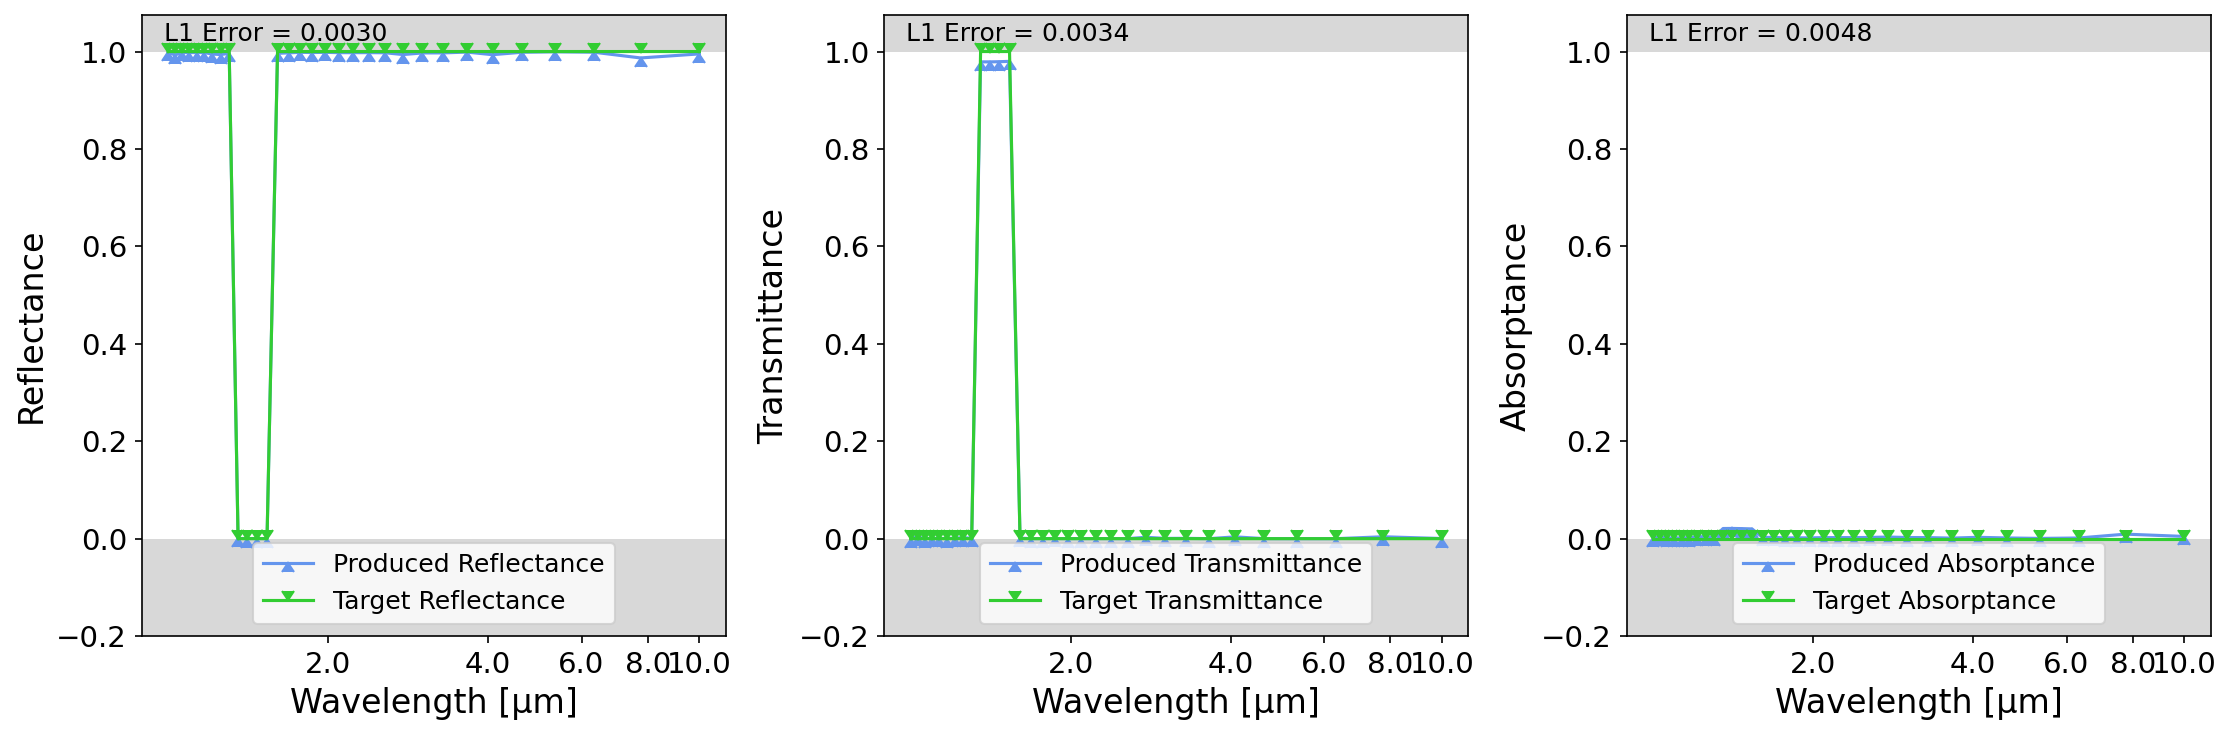

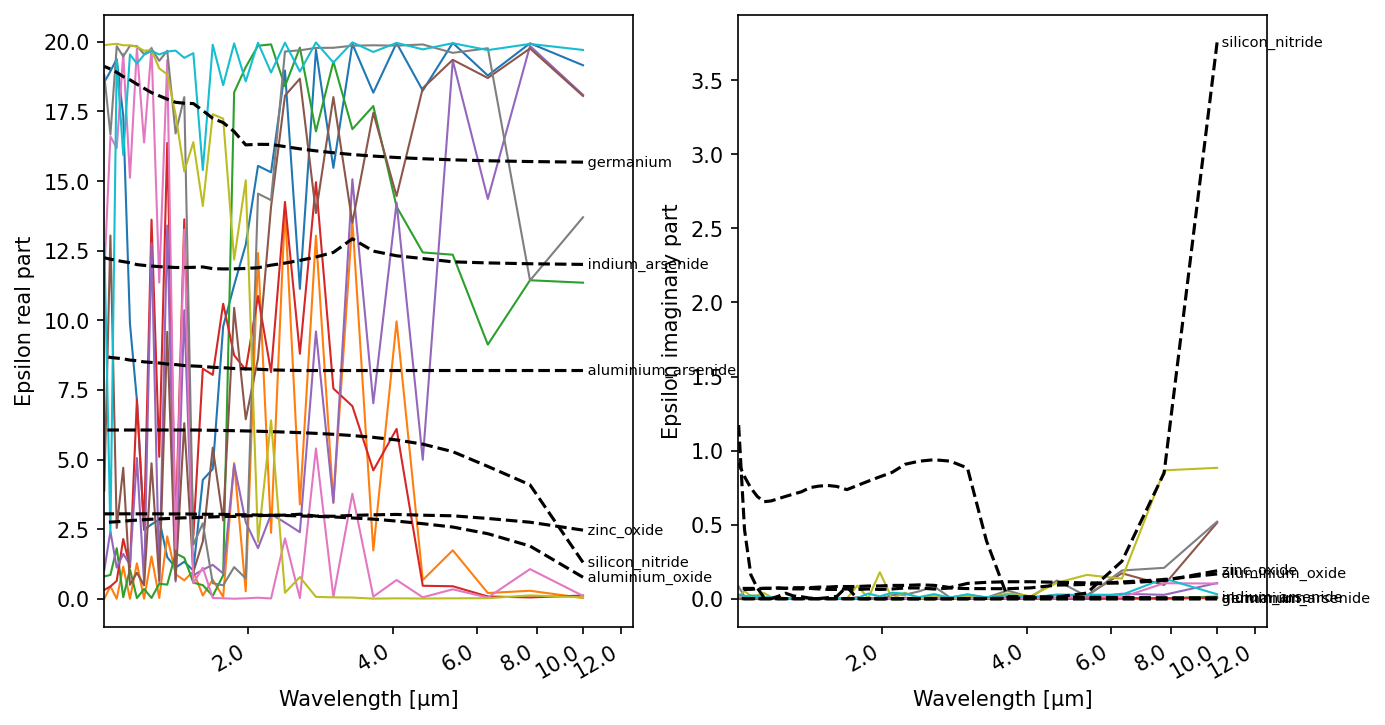

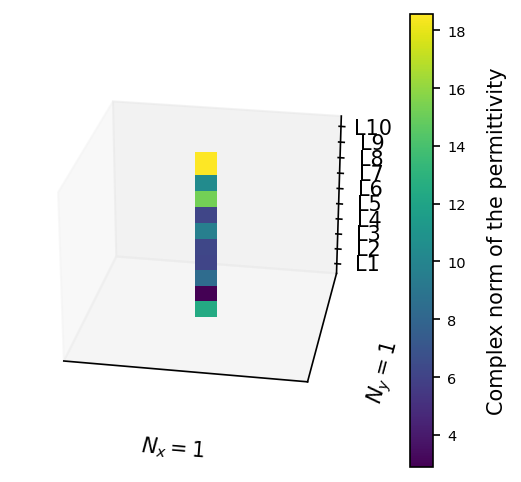

In [5]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg,legend=False)
nidn.plot_model_grid(cfg)

In [6]:
cfg.name = "filter_rcwa_reg"
nidn.save_run(cfg)

10:38:50|NIDN-INFO| Saving run to file: ../results//filter_rcwa_reg_20-05-2022 10-38-50_run.pk


# Classification

In [7]:
cfg.pop("model",None); # Forget the old model

cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.eps_oversampling = 1
cfg.N_layers = 10 # Choose number of layers
cfg.PER_LAYER_THICKNESS = [1.0]

cfg.type = "classification" # Choose type as described above
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [8]:
nidn.run_training(cfg);

10:38:51|NIDN-INFO| ###  New Best=0.4974 with SpectrumLoss=0.4926 ### L1=0.4926
10:38:51|NIDN-INFO| It=0     Loss=0.4974   |  weighted_avg=0.4974  |  SpectrumLoss=0.4926 | L1=0.4926
10:38:51|NIDN-INFO| ###  New Best=0.4863 with SpectrumLoss=0.4815 ### L1=0.4815
10:38:52|NIDN-INFO| ###  New Best=0.4677 with SpectrumLoss=0.4629 ### L1=0.4629
10:38:53|NIDN-INFO| ###  New Best=0.4330 with SpectrumLoss=0.4284 ### L1=0.4284
10:38:55|NIDN-INFO| It=5     Loss=0.4361   |  weighted_avg=0.4595  |  SpectrumLoss=0.4316 | L1=0.4316
10:38:56|NIDN-INFO| ###  New Best=0.4323 with SpectrumLoss=0.4278 ### L1=0.4278
10:38:57|NIDN-INFO| ###  New Best=0.4253 with SpectrumLoss=0.4211 ### L1=0.4211
10:38:58|NIDN-INFO| ###  New Best=0.4197 with SpectrumLoss=0.4156 ### L1=0.4156
10:38:59|NIDN-INFO| ###  New Best=0.4134 with SpectrumLoss=0.4093 ### L1=0.4093
10:39:00|NIDN-INFO| ###  New Best=0.4080 with SpectrumLoss=0.4041 ### L1=0.4041
10:39:00|NIDN-INFO| It=10    Loss=0.4080   |  weighted_avg=0.4414  |  Spectr

10:39:52|NIDN-INFO| ###  New Best=0.3381 with SpectrumLoss=0.3360 ### L1=0.3360
10:39:53|NIDN-INFO| ###  New Best=0.3379 with SpectrumLoss=0.3357 ### L1=0.3357
10:39:53|NIDN-INFO| It=65    Loss=0.3379   |  weighted_avg=0.3403  |  SpectrumLoss=0.3357 | L1=0.3357
10:39:54|NIDN-INFO| ###  New Best=0.3376 with SpectrumLoss=0.3355 ### L1=0.3355
10:39:54|NIDN-INFO| ###  New Best=0.3374 with SpectrumLoss=0.3352 ### L1=0.3352
10:39:55|NIDN-INFO| ###  New Best=0.3371 with SpectrumLoss=0.3350 ### L1=0.3350
10:39:56|NIDN-INFO| ###  New Best=0.3368 with SpectrumLoss=0.3347 ### L1=0.3347
10:39:57|NIDN-INFO| ###  New Best=0.3364 with SpectrumLoss=0.3343 ### L1=0.3343
10:39:57|NIDN-INFO| It=70    Loss=0.3364   |  weighted_avg=0.3389  |  SpectrumLoss=0.3343 | L1=0.3343
10:39:58|NIDN-INFO| ###  New Best=0.3360 with SpectrumLoss=0.3339 ### L1=0.3339
10:39:59|NIDN-INFO| ###  New Best=0.3355 with SpectrumLoss=0.3335 ### L1=0.3335
10:40:00|NIDN-INFO| ###  New Best=0.3351 with SpectrumLoss=0.3330 ### L1=0.3

10:41:18|NIDN-INFO| ###  New Best=0.3117 with SpectrumLoss=0.3100 ### L1=0.3100
10:41:18|NIDN-INFO| It=155   Loss=0.3117   |  weighted_avg=0.3120  |  SpectrumLoss=0.3100 | L1=0.3100
10:41:19|NIDN-INFO| ###  New Best=0.3117 with SpectrumLoss=0.3100 ### L1=0.3100
10:41:20|NIDN-INFO| ###  New Best=0.3117 with SpectrumLoss=0.3100 ### L1=0.3100
10:41:21|NIDN-INFO| ###  New Best=0.3117 with SpectrumLoss=0.3099 ### L1=0.3099
10:41:22|NIDN-INFO| ###  New Best=0.3116 with SpectrumLoss=0.3099 ### L1=0.3099
10:41:23|NIDN-INFO| ###  New Best=0.3116 with SpectrumLoss=0.3099 ### L1=0.3099
10:41:23|NIDN-INFO| It=160   Loss=0.3116   |  weighted_avg=0.3119  |  SpectrumLoss=0.3099 | L1=0.3099
10:41:24|NIDN-INFO| ###  New Best=0.3116 with SpectrumLoss=0.3099 ### L1=0.3099
10:41:25|NIDN-INFO| ###  New Best=0.3116 with SpectrumLoss=0.3098 ### L1=0.3098
10:41:26|NIDN-INFO| ###  New Best=0.3115 with SpectrumLoss=0.3098 ### L1=0.3098
10:41:27|NIDN-INFO| ###  New Best=0.3115 with SpectrumLoss=0.3098 ### L1=0.3

10:42:17|NIDN-INFO| ###  New Best=0.3103 with SpectrumLoss=0.3085 ### L1=0.3085
10:42:18|NIDN-INFO| ###  New Best=0.3103 with SpectrumLoss=0.3084 ### L1=0.3084
10:42:19|NIDN-INFO| ###  New Best=0.3102 with SpectrumLoss=0.3084 ### L1=0.3084
10:42:20|NIDN-INFO| ###  New Best=0.3102 with SpectrumLoss=0.3083 ### L1=0.3083
10:42:20|NIDN-INFO| It=220   Loss=0.3102   |  weighted_avg=0.3106  |  SpectrumLoss=0.3083 | L1=0.3083
10:42:21|NIDN-INFO| ###  New Best=0.3101 with SpectrumLoss=0.3082 ### L1=0.3082
10:42:22|NIDN-INFO| ###  New Best=0.3100 with SpectrumLoss=0.3081 ### L1=0.3081
10:42:23|NIDN-INFO| ###  New Best=0.3100 with SpectrumLoss=0.3080 ### L1=0.3080
10:42:24|NIDN-INFO| ###  New Best=0.3099 with SpectrumLoss=0.3079 ### L1=0.3079
10:42:25|NIDN-INFO| ###  New Best=0.3098 with SpectrumLoss=0.3078 ### L1=0.3078
10:42:25|NIDN-INFO| It=225   Loss=0.3098   |  weighted_avg=0.3103  |  SpectrumLoss=0.3078 | L1=0.3078
10:42:26|NIDN-INFO| ###  New Best=0.3097 with SpectrumLoss=0.3077 ### L1=0.3

10:43:34|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3022 ### L1=0.3022
10:43:35|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3022 ### L1=0.3022
10:43:36|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3022 ### L1=0.3022
10:43:36|NIDN-INFO| It=300   Loss=0.3039   |  weighted_avg=0.3040  |  SpectrumLoss=0.3022 | L1=0.3022
10:43:37|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3022 ### L1=0.3022
10:43:38|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3022 ### L1=0.3022
10:43:39|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3022 ### L1=0.3022
10:43:40|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3022 ### L1=0.3022
10:43:41|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3022 ### L1=0.3022
10:43:41|NIDN-INFO| It=305   Loss=0.3039   |  weighted_avg=0.3040  |  SpectrumLoss=0.3022 | L1=0.3022
10:43:42|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3021 ### L1=0.3021
10:43:43|NIDN-INFO| ###  New Best=0.3039 with SpectrumLoss=0.3021 ### L1=0.3

10:44:57|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3018
10:44:57|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3018
10:44:57|NIDN-INFO| It=415   Loss=0.3034   |  weighted_avg=0.3035  |  SpectrumLoss=0.3018 | L1=0.3018
10:44:58|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3018
10:44:59|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3018
10:44:59|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3018
10:45:00|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3018
10:45:01|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3018
10:45:01|NIDN-INFO| It=420   Loss=0.3034   |  weighted_avg=0.3034  |  SpectrumLoss=0.3018 | L1=0.3018
10:45:01|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3018
10:45:02|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3018
10:45:02|NIDN-INFO| ###  New Best=0.3034 with SpectrumLoss=0.3018 ### L1=0.3

10:45:38|NIDN-INFO| ###  New Best=0.3033 with SpectrumLoss=0.3017 ### L1=0.3017
10:45:38|NIDN-INFO| ###  New Best=0.3033 with SpectrumLoss=0.3017 ### L1=0.3017
10:45:39|NIDN-INFO| ###  New Best=0.3033 with SpectrumLoss=0.3017 ### L1=0.3017
10:45:40|NIDN-INFO| ###  New Best=0.3033 with SpectrumLoss=0.3017 ### L1=0.3017
10:45:40|NIDN-INFO| ###  New Best=0.3033 with SpectrumLoss=0.3017 ### L1=0.3017
10:45:40|NIDN-INFO| It=480   Loss=0.3033   |  weighted_avg=0.3033  |  SpectrumLoss=0.3017 | L1=0.3017
10:45:41|NIDN-INFO| ###  New Best=0.3033 with SpectrumLoss=0.3016 ### L1=0.3016
10:45:42|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:45:42|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:45:43|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:45:44|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:45:44|NIDN-INFO| It=485   Loss=0.3032   |  weighted_avg=0.3033  |  SpectrumLoss=0.3016 | L1=0.3

10:46:19|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:46:20|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:46:20|NIDN-INFO| It=540   Loss=0.3032   |  weighted_avg=0.3032  |  SpectrumLoss=0.3016 | L1=0.3016
10:46:21|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:46:21|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:46:22|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:46:23|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:46:24|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:46:24|NIDN-INFO| It=545   Loss=0.3032   |  weighted_avg=0.3032  |  SpectrumLoss=0.3016 | L1=0.3016
10:46:24|NIDN-INFO| ###  New Best=0.3032 with SpectrumLoss=0.3016 ### L1=0.3016
10:46:25|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3016 ### L1=0.3016
10:46:26|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3016 ### L1=0.3

10:47:01|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:01|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:02|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:03|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:03|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:03|NIDN-INFO| It=605   Loss=0.3031   |  weighted_avg=0.3031  |  SpectrumLoss=0.3015 | L1=0.3015
10:47:04|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:05|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:05|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:06|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:07|NIDN-INFO| ###  New Best=0.3031 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:07|NIDN-INFO| It=610   Loss=0.3031   |  weighted_avg=0.3031  |  SpectrumLoss=0.3015 | L1=0.3

10:47:42|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:43|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:43|NIDN-INFO| It=665   Loss=0.3030   |  weighted_avg=0.3030  |  SpectrumLoss=0.3015 | L1=0.3015
10:47:44|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:44|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3015 ### L1=0.3015
10:47:45|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:47:46|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:47:46|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:47:46|NIDN-INFO| It=670   Loss=0.3030   |  weighted_avg=0.3030  |  SpectrumLoss=0.3014 | L1=0.3014
10:47:47|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:47:48|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:47:48|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3

10:48:23|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:24|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:25|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:25|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:26|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:26|NIDN-INFO| It=730   Loss=0.3030   |  weighted_avg=0.3030  |  SpectrumLoss=0.3014 | L1=0.3014
10:48:27|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:27|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:28|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:29|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:30|NIDN-INFO| ###  New Best=0.3030 with SpectrumLoss=0.3014 ### L1=0.3014
10:48:30|NIDN-INFO| It=735   Loss=0.3030   |  weighted_avg=0.3030  |  SpectrumLoss=0.3014 | L1=0.3

10:49:08|NIDN-INFO| It=790   Loss=0.3029   |  weighted_avg=0.3029  |  SpectrumLoss=0.3014 | L1=0.3014
10:49:12|NIDN-INFO| It=795   Loss=0.3039   |  weighted_avg=0.3030  |  SpectrumLoss=0.3023 | L1=0.3023
10:49:15|NIDN-INFO| It=800   Loss=0.3032   |  weighted_avg=0.3045  |  SpectrumLoss=0.3017 | L1=0.3017
10:49:18|NIDN-INFO| It=805   Loss=0.3033   |  weighted_avg=0.3048  |  SpectrumLoss=0.3018 | L1=0.3018
10:49:21|NIDN-INFO| It=810   Loss=0.3031   |  weighted_avg=0.3049  |  SpectrumLoss=0.3015 | L1=0.3015
10:49:25|NIDN-INFO| It=815   Loss=0.3032   |  weighted_avg=0.3050  |  SpectrumLoss=0.3016 | L1=0.3016
10:49:28|NIDN-INFO| It=820   Loss=0.3033   |  weighted_avg=0.3036  |  SpectrumLoss=0.3017 | L1=0.3017
10:49:31|NIDN-INFO| It=825   Loss=0.3031   |  weighted_avg=0.3033  |  SpectrumLoss=0.3015 | L1=0.3015
10:49:34|NIDN-INFO| It=830   Loss=0.3030   |  weighted_avg=0.3032  |  SpectrumLoss=0.3014 | L1=0.3014
10:49:38|NIDN-INFO| It=835   Loss=0.3030   |  weighted_avg=0.3031  |  SpectrumLoss

10:50:27|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3013
10:50:27|NIDN-INFO| It=910   Loss=0.3029   |  weighted_avg=0.3029  |  SpectrumLoss=0.3013 | L1=0.3013
10:50:28|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3013
10:50:28|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3013
10:50:29|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3013
10:50:30|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3013
10:50:30|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3013
10:50:30|NIDN-INFO| It=915   Loss=0.3029   |  weighted_avg=0.3029  |  SpectrumLoss=0.3013 | L1=0.3013
10:50:31|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3013
10:50:32|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3013
10:50:32|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3013
10:50:33|NIDN-INFO| ###  New Best=0.3029 with SpectrumLoss=0.3013 ### L1=0.3

10:51:08|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3013
10:51:08|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3013
10:51:09|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3013
10:51:10|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3013
10:51:10|NIDN-INFO| It=975   Loss=0.3028   |  weighted_avg=0.3029  |  SpectrumLoss=0.3013 | L1=0.3013
10:51:11|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3013
10:51:11|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3013
10:51:12|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3013
10:51:13|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3013
10:51:13|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3013
10:51:13|NIDN-INFO| It=980   Loss=0.3028   |  weighted_avg=0.3028  |  SpectrumLoss=0.3013 | L1=0.3013
10:51:14|NIDN-INFO| ###  New Best=0.3028 with SpectrumLoss=0.3013 ### L1=0.3

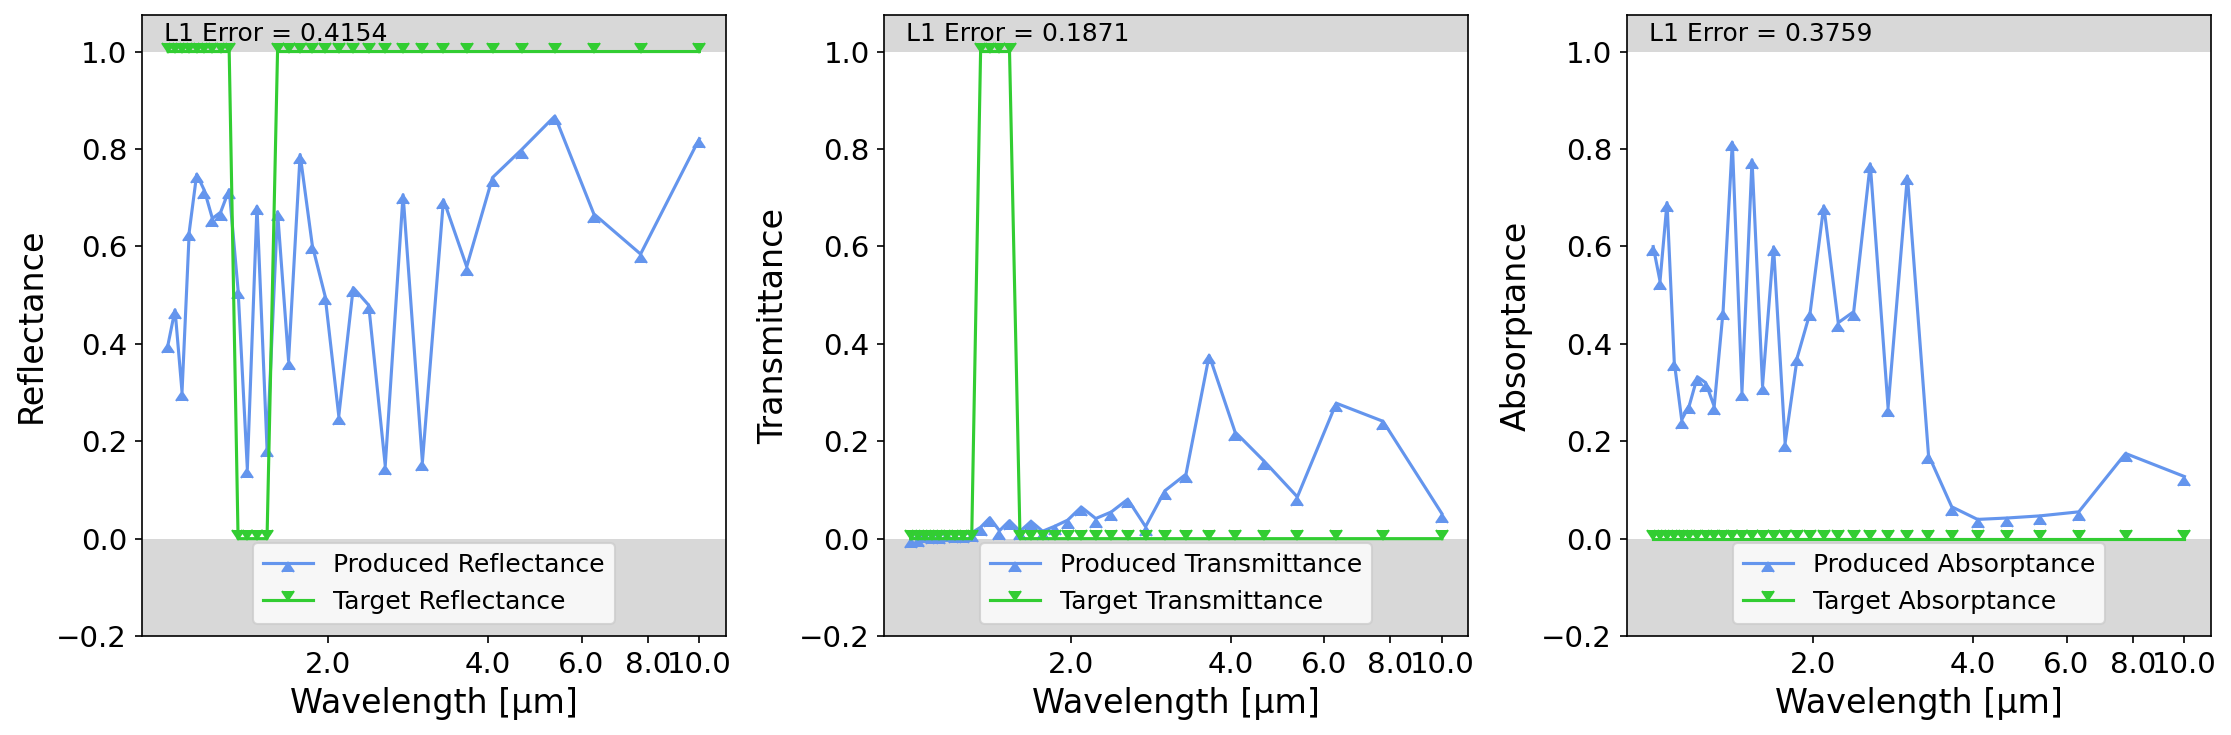

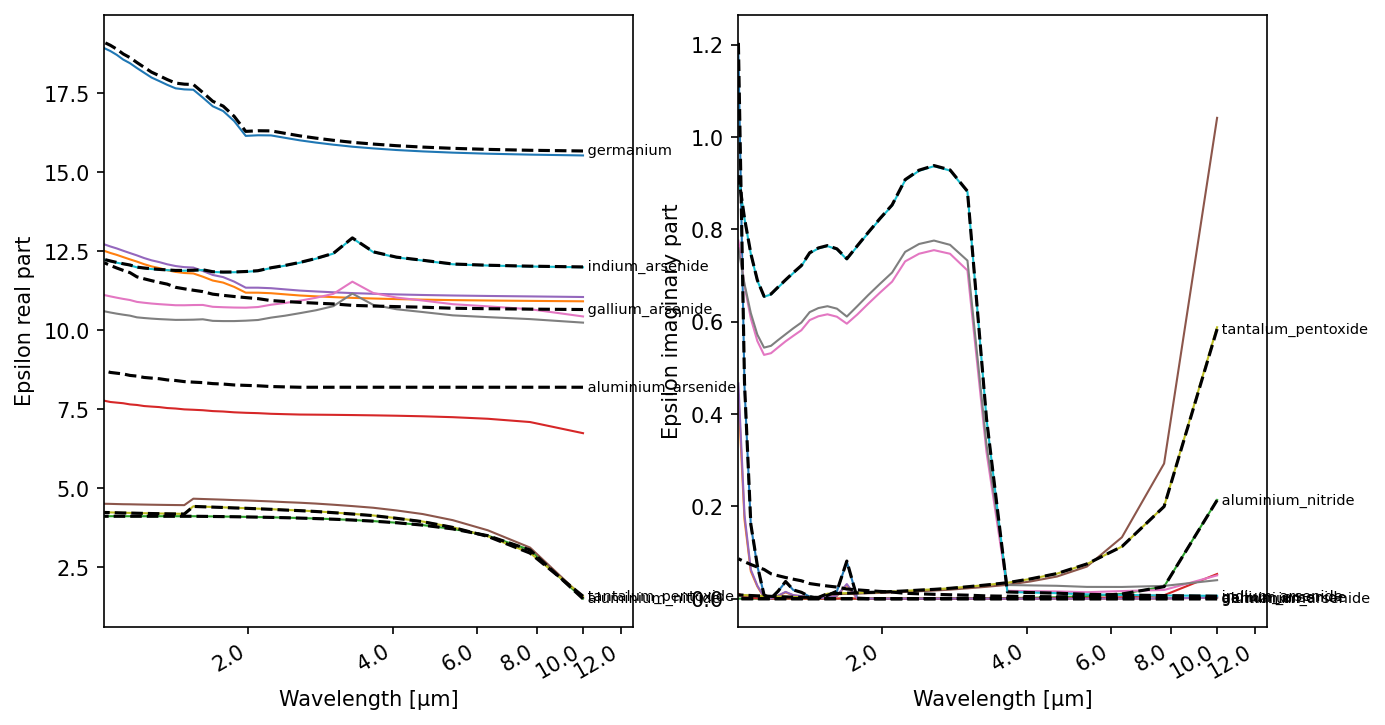

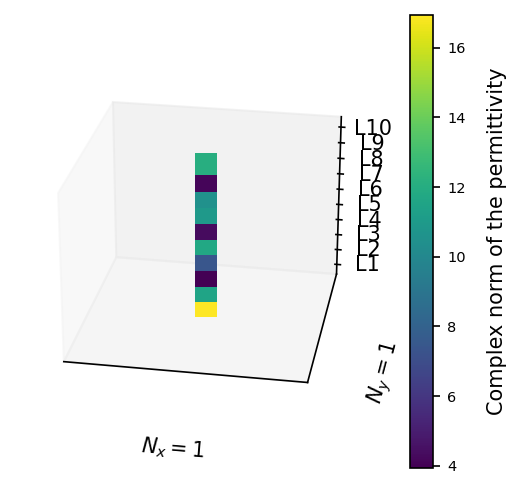

In [9]:
# The other plots
nidn.plot_spectra(cfg)
nidn.plot_eps_per_point(cfg,legend=False)
nidn.plot_model_grid(cfg)

In [10]:
cfg.name = "filter_rcwa_class"
nidn.save_run(cfg)

10:51:28|NIDN-INFO| Saving run to file: ../results//filter_rcwa_class_20-05-2022 10-51-28_run.pk
